In [2]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# Read the CSV
df = pd.read_csv("Kids_ScreenTime_Cleaned.csv")

# Preview
df.head()

Saving Kids_ScreenTime_Cleaned.csv to Kids_ScreenTime_Cleaned.csv


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Group,Health_Category,Device_Type,Screen_Time_Category
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,Pre-Teen (11-14),Physical,Portable,Moderate
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,Pre-Teen (11-14),NaN,Portable,High
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,Teenager (15-18),NaN,Large Screen,Moderate
3,15,Female,1.21,Laptop,False,0.39,No Reported Issues,Urban,Teenager (15-18),NaN,Portable,Low
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,Pre-Teen (11-14),Mental,Portable,High


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

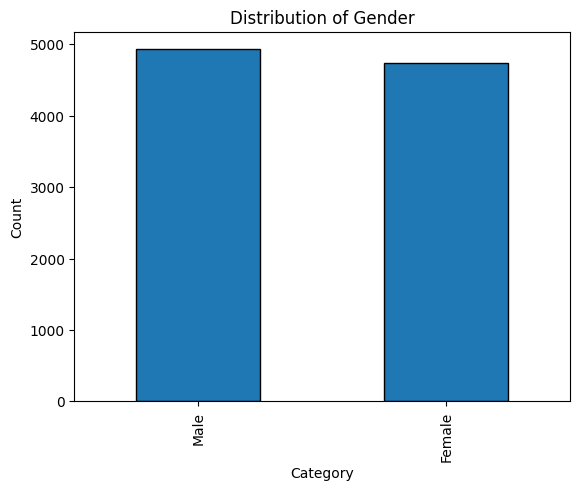

In [5]:
# Univariate - Categorical column
df['Gender'].value_counts().plot(kind="bar", edgecolor="black")
plt.title("Distribution of Gender")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

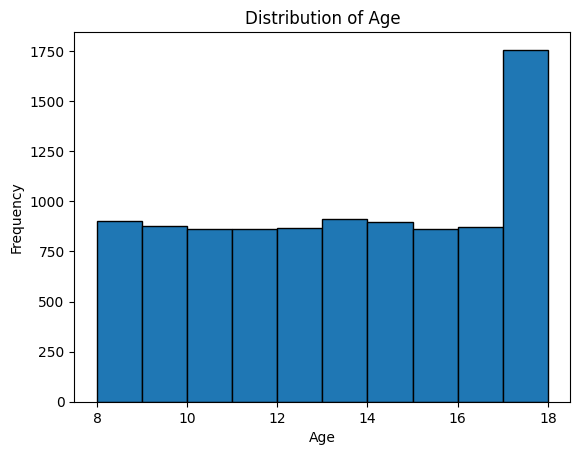

In [6]:
# Univariate - Numerical column
plt.hist(df['Age'], bins=10, edgecolor="black")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

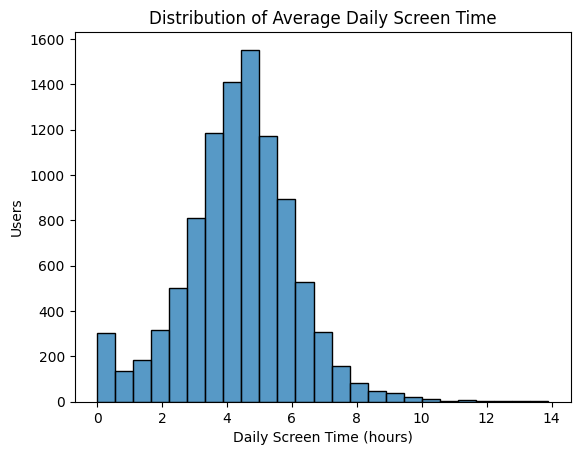

In [ ]:
# Univariate Analysis - Screen Time Distribution

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Avg_Daily_Screen_Time_hr'], bins=25, edgecolor="black")
plt.xlabel("Daily Screen Time (hours)")
plt.ylabel("Users")
plt.title("Distribution of Average Daily Screen Time")
plt.show()

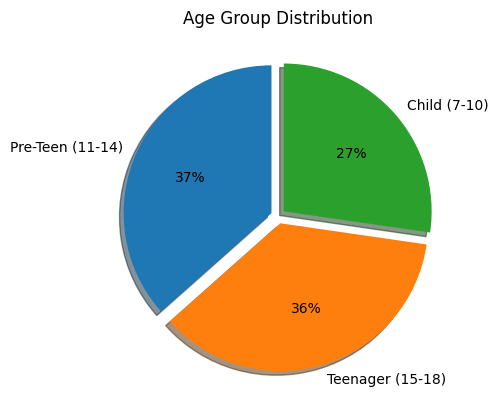

In [ ]:
# Univariate Analysis - Age Group Distribution

import matplotlib.pyplot as plt

df['Age_Group'].value_counts().plot.pie(
    autopct='%1.0f%%', startangle=90, shadow=True, explode=[0.05]*df['Age_Group'].nunique()
)
plt.ylabel("")
plt.title("Age Group Distribution")
plt.show()

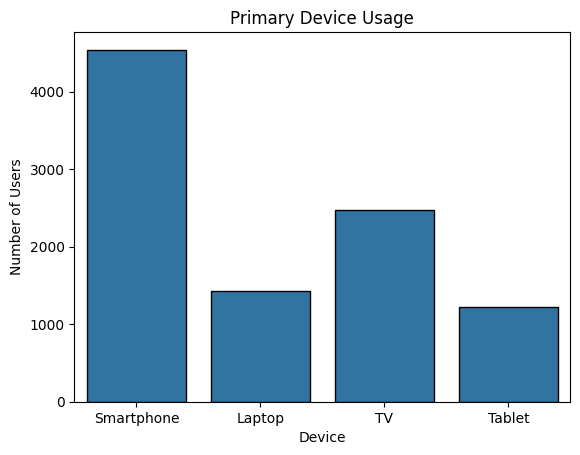

In [ ]:
# Univariate Analysis - Primary Device Usage

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Primary_Device", data=df, edgecolor="black")
plt.xlabel("Device")
plt.ylabel("Number of Users")
plt.title("Primary Device Usage")
plt.show()


/tmp/ipython-input-1295580312.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'], shade=True)


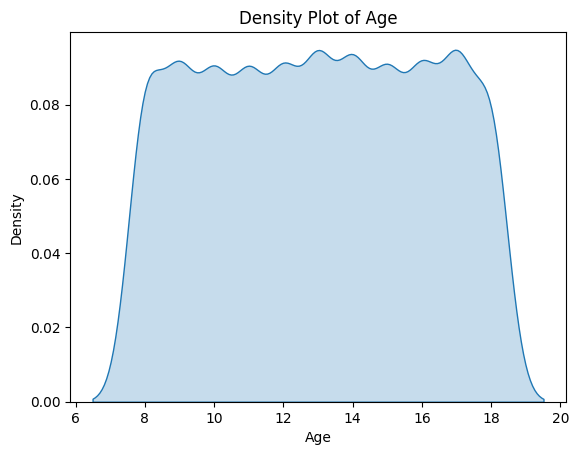

In [9]:
sns.kdeplot(df['Age'], shade=True)
plt.title("Density Plot of Age")
plt.xlabel("Age")
plt.show()

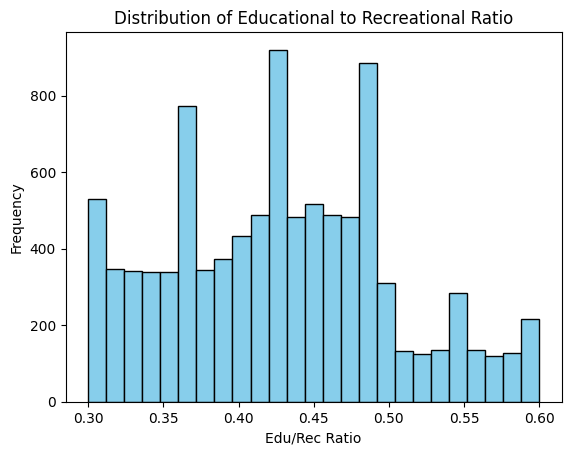

In [ ]:
# Univariate Analysis - Educational to Recreational Ratio
df['Educational_to_Recreational_Ratio'].plot(
    kind='hist',
    bins=25,
    edgecolor='black',
    color='skyblue',
    title='Distribution of Educational to Recreational Ratio'
)
plt.xlabel("Edu/Rec Ratio")
plt.ylabel("Frequency")
plt.show()

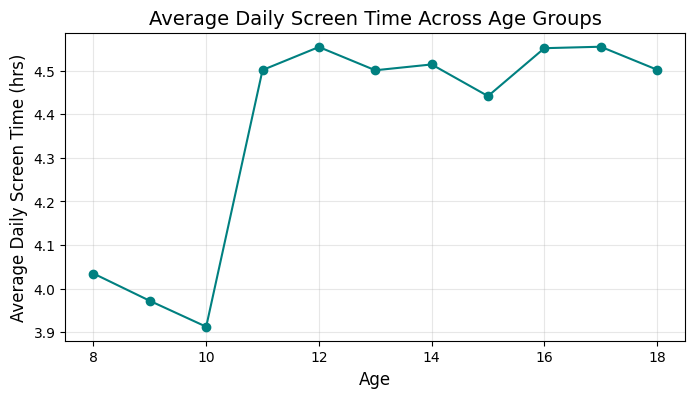

In [ ]:
# Bivariate Analysis - Screen Time by Age Group
avg_screen_time_by_age = df.groupby('Age')['Avg_Daily_Screen_Time_hr'].mean()

plt.figure(figsize=(8,4))
plt.plot(avg_screen_time_by_age.index, avg_screen_time_by_age.values, marker='o', linestyle='-', color='teal')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Average Daily Screen Time (hrs)", fontsize=12)
plt.title("Average Daily Screen Time Across Age Groups", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

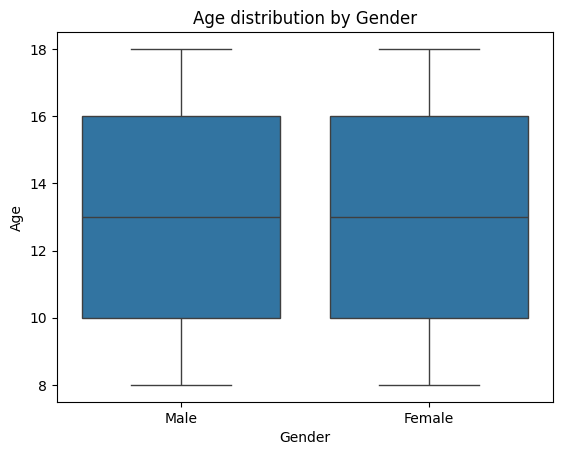

In [7]:
# Bivariate - Age by Gender
sns.boxplot(x="Gender", y="Age", data=df)
plt.title("Age distribution by Gender")
plt.show()

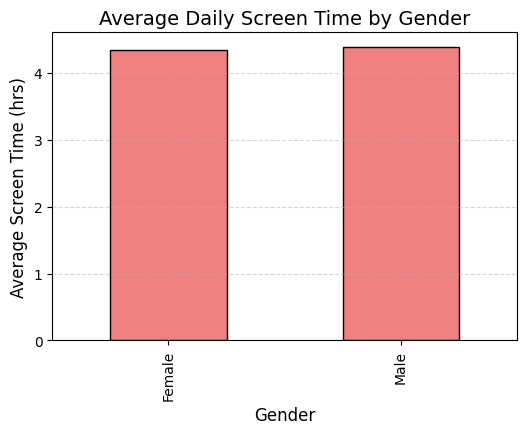

In [ ]:
# Bivariate Analysis - Average Daily Screen Time by Gender
avg_screen_time_by_gender = df.groupby('Gender')['Avg_Daily_Screen_Time_hr'].mean()

plt.figure(figsize=(6,4))
avg_screen_time_by_gender.plot(
    kind='bar',
    color='lightcoral',
    edgecolor='black'
)
plt.ylabel("Average Screen Time (hrs)", fontsize=12)
plt.xlabel("Gender", fontsize=12)
plt.title("Average Daily Screen Time by Gender", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


<Figure size 800x500 with 0 Axes>

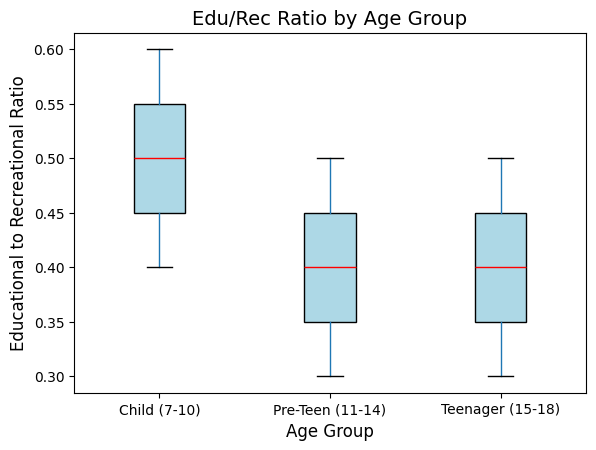

In [ ]:
# Bivariate Analysis - Educational to Recreational Ratio by Age Group
plt.figure(figsize=(8,5))
df.boxplot(
    column="Educational_to_Recreational_Ratio",
    by="Age_Group",
    grid=False,
    patch_artist=True,      # Adds color to the boxes
    boxprops=dict(facecolor='lightblue', color='black'),
    medianprops=dict(color='red')
)
plt.suptitle("")  # Removes default 'by' title
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Educational to Recreational Ratio", fontsize=12)
plt.title("Edu/Rec Ratio by Age Group", fontsize=14)
plt.show()


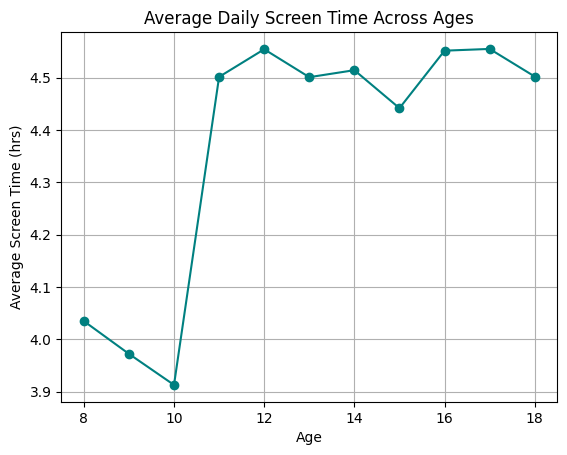

In [ ]:
# Average Screen Time across Ages
avg_screen_time_by_age = df.groupby('Age')['Avg_Daily_Screen_Time_hr'].mean()
avg_screen_time_by_age.plot(kind='line', marker='o', color='teal')
plt.xlabel("Age")
plt.ylabel("Average Screen Time (hrs)")
plt.title("Average Daily Screen Time Across Ages")
plt.grid(True)
plt.show()

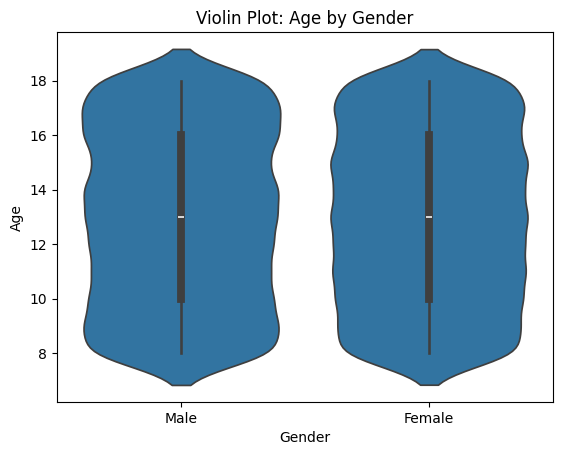

In [11]:
sns.violinplot(x="Gender", y="Age", data=df)
plt.title("Violin Plot: Age by Gender")
plt.show()

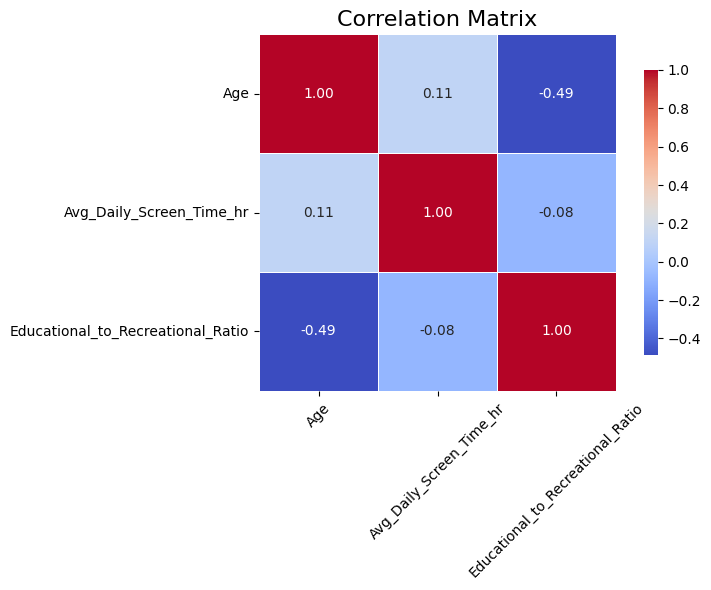

In [13]:
# Select relevant numeric columns
corr_cols = ['Age', 'Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio']
corr_matrix = df[corr_cols].corr()

# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()